In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from matplotlib import pyplot as plt

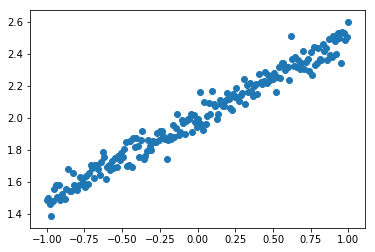

In [3]:
X = np.linspace(-1,1,200)
np.random.shuffle(X)
#print(X)
Y = 0.5*X + 2 + np.random.normal(0,0.05,(200,))
plt.scatter(X,Y)
plt.show()

In [8]:
X_train,Y_train=X[:150],Y[:150]
X_test,Y_test=X[150:],Y[150:]
model=keras.Sequential()
model.add(keras.layers.Dense(150))
model.compile(loss='MSE',optimizer='SGD')


In [ ]:
#以后备用
def add_layer(inputs,in_size,out_size,activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size,out_size]))
    biases = tf.Variable(tf.zeros([1,out_size])+0.1)
    Wx_plus_b = tf.matmul(inputs,Weights)+biases
    if activation_function:
        outputs=activation_function(Wx_plus_b)
    else:
        outputs=Wx_plus_b
    return outputs


def weight_variable(shape):
    return tf.Variable(tf.truncated_normal(shape,stddev=0.1))

def bias_variable(shape):
    return tf.Variable(tf.constant(0.1,shape=shape))

def conv2d(x,W):
    return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='SAME')

def max_pool_2x2(x):
    #max or avg pooling
    #ksize=kernal size
    #strides=步长
    return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')


W_conv1 = tf.Variable(tf.truncated_normal([5,5,1,32],stddev=0.1)) 
b_conv1 = tf.Variable(tf.constant(0.1,shape=[32]))
h_conv1 = tf.nn.relu(tf.nn.conv2d(x_images,W_conv1,strides=[1,1,1,1],padding='SAME') + b_conv1)
h_pool1 = tf.nn.max_pool(h_conv1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

W_conv2 = tf.Variable(tf.truncated_normal([5,5,32,64],stddev=0.1))
b_conv2 = tf.Variable(tf.constant(0.1,shape=[64]))
h_conv2 = tf.nn.relu(tf.nn.conv2d(x_images,W_conv2,strides=[1,1,1,1],padding='SAME') + b_conv2)
h_pool1 = tf.nn.max_pool(h_conv2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')